In [3]:
import nltk
from nltk import Text, sent_tokenize, word_tokenize, RegexpTokenizer

In [4]:
import pandas as pd

In [5]:
sleep = open('/home/amn34/metis/stuff/noirs/chandler/rc_bigsleep.txt').read()

In [6]:
sleep[0:50]

"It was about eleven o'clock in the morning, mid Oc"

In [7]:
sleep = sleep.decode('utf-8')

In [8]:
sleep = sleep.lower()

In [9]:
sleep[0:50]

u"it was about eleven o'clock in the morning, mid oc"

In [10]:
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
sleepwords = tokenizer.tokenize(sleep)

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('said')

In [13]:
sleepstop = [w for w in sleepwords if not w in stop]

In [14]:
sent = pd.read_pickle('sentiment.pkl')

In [15]:
sent.fillna(0, inplace=True)

In [16]:
sent.sentiment.replace({'negative':-1,'positive':1}, inplace=True)

In [17]:
sent['word'] = sent['word'].values.astype('unicode')

In [18]:
sleepwords = pd.DataFrame(columns=['word'])

In [19]:
sleepwords.word = sleepstop

In [20]:
sleepwords.head()

,word
0,eleven
1,clock
2,morning
3,mid
4,october


In [21]:
sent.head()

,word,emotion,sentiment
0,2-faced,0,-1
1,2-faces,0,-1
2,a+,0,1
3,aback,0,0
4,abacus,trust,0


In [22]:
sleepsentiment = pd.merge(sleepwords, sent, how='left', on='word')

In [23]:
sleepsentiment['index'] = sleepsentiment.index

In [24]:
sleepsentiment.head()

,word,emotion,sentiment,index
0,eleven,NaN,NaN,0
1,clock,anticipation,0.0,1
2,morning,NaN,NaN,2
3,mid,0,0.0,3
4,october,NaN,NaN,4


In [92]:
len(sleepstop)

31642

In [95]:
import numpy as np

In [98]:
for k, g in sleepsentiment.groupby(np.arange(len(sleepsentiment))//150): print (k,g)

(0,              word       emotion  sentiment  index
0          eleven           NaN        NaN      0
1           clock  anticipation        0.0      1
2         morning           NaN        NaN      2
3             mid             0        0.0      3
4         october           NaN        NaN      4
5             sun  anticipation        1.0      5
6         shining  anticipation        1.0      6
7            look             0        0.0      7
8            hard             0       -1.0      8
9             wet             0        0.0      9
10           rain             0        0.0     10
11      clearness             0        1.0     11
12      foothills           NaN        NaN     12
13        wearing           NaN        NaN     13
14         powder             0        0.0     14
15           blue       sadness        0.0     15
16           suit             0        1.0     16
17           dark       sadness       -1.0     17
18           blue       sadness        0.0    

In [25]:
sleepsentiment.fillna(0,inplace=True)

In [26]:
sample = sleepsentiment[0:1000]

In [27]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [38]:
pagesent = []

for i in chunker(sleepsentiment,150):
    pagesent.append([sum(i.sentiment)])

In [40]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/home/amn34/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


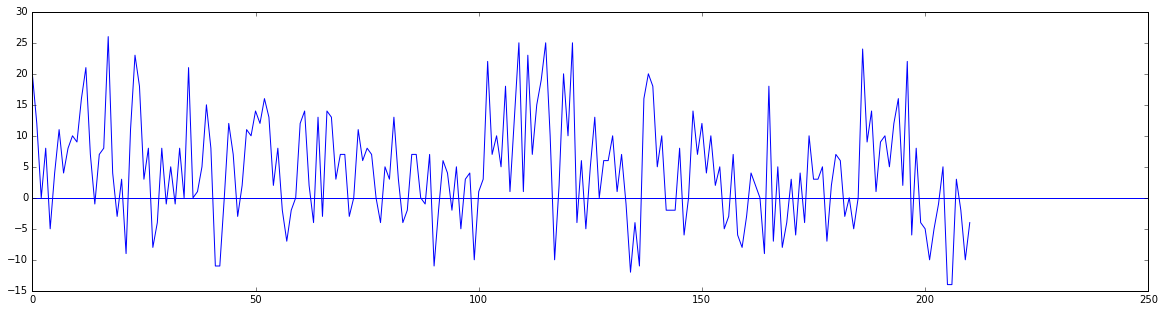

In [47]:
plt.figure(figsize=(20,5))
plt.axhline(y=0)
plt.plot(pagesent)